# 퍼셉트론 학습 실습

이 노트북에서는 퍼셉트론의 그래디언트 계산과 가중치 갱신 과정을 단계별로 살펴봅니다.

## 사용할 수식

**활성화 함수:** $\sigma(z) \in \{0, 1\}$ (Unit Step 함수)

$$\sigma(z) = \begin{cases} 1 & \text{if } z \geq 0 \\ 0 & \text{if } z < 0 \end{cases}$$

**그래디언트:**

$$\frac{\partial J}{\partial w_i} = \sum_{k=1}^{N} -(y_k - \sigma(z_k)) x_{ki}$$

**가중치 갱신:**

$$w_i \leftarrow w_i + \rho \sum_{k=1}^{N} (y_k - \sigma(z_k)) x_{ki}$$

**행렬 형태:**

$$\mathbf{w} \leftarrow \mathbf{w} + \rho \, \mathbf{X}^T (\mathbf{y} - \sigma(\mathbf{z}))$$

---
## Step 0: 라이브러리 임포트

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 그래프 설정
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['axes.unicode_minus'] = False

---
## Step 1: 데이터 준비

5개의 샘플을 준비합니다. $x_0 = 1$은 bias term입니다.

| $k$ | $x_0$ | $x_1$ | $x_2$ | $y$ |
|:---:|:---:|:---:|:---:|:---:|
| 1 | 1 | 0 | 0 | 0 |
| 2 | 1 | 0 | 1 | 0 |
| 3 | 1 | 4 | 4 | 1 |
| 4 | 1 | 1 | 2 | 0 |
| 5 | 1 | 2 | 1 | 0 |

In [2]:
# 입력 데이터 (x0=1은 bias term)
X = np.array([
    [1, 0, 0],  # x1
    [1, 0, 1],  # x2
    [1, 4, 4],  # x3
    [1, 1, 2],  # x4
    [1, 2, 1],  # x5
])

# 레이블 (0 또는 1)
y = np.array([0, 0, 1, 0, 0])

print("입력 데이터 X:")
print(X)
print("\n레이블 y:", y)

입력 데이터 X:
[[1 0 0]
 [1 0 1]
 [1 4 4]
 [1 1 2]
 [1 2 1]]

레이블 y: [0 0 1 0 0]


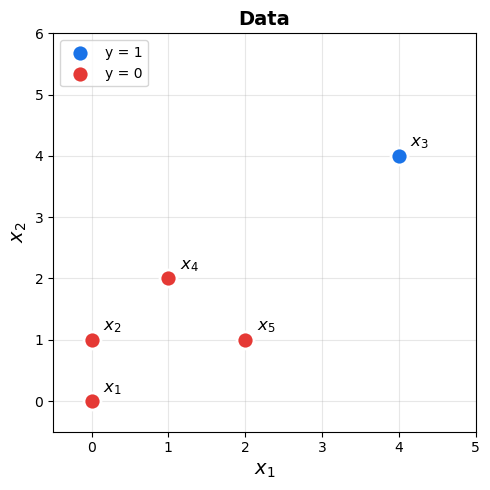

In [3]:
def plot_data(ax, X, y, title):
    """데이터시각화"""
    
    # 클래스별 분리
    pos_idx = y == 1
    neg_idx = y == 0
    
    # Scatter plot
    ax.scatter(X[pos_idx, 1], X[pos_idx, 2], c='#1a73e8', s=150, 
               marker='o', label='y = 1', edgecolors='white', linewidths=2, zorder=5)
    ax.scatter(X[neg_idx, 1], X[neg_idx, 2], c='#e53935', s=150, 
               marker='o', label='y = 0', edgecolors='white', linewidths=2, zorder=5)
    
    # 샘플 번호
    for k in range(len(X)):
        ax.annotate(f'$x_{k+1}$', (X[k,1]+0.15, X[k,2]+0.15), fontsize=12, fontweight='bold')
    
    ax.set_xlim(-0.5, 5)
    ax.set_ylim(-0.5, 6)
    ax.set_xlabel('$x_1$', fontsize=14)
    ax.set_ylabel('$x_2$', fontsize=14)
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.legend(loc='upper left', fontsize=10)
    ax.grid(True, alpha=0.3)
    
    return ax

# 그래프
fig, ax = plt.subplots(figsize=(5, 5))
ax = plot_data(ax, X, y, 'Data')
plt.tight_layout()
plt.show()

---
## Step 2: 초기 가중치 설정

$$\mathbf{w} = (w_0, w_1, w_2) = (-25, 10, 10)$$

In [4]:
# 초기 가중치
w = np.array([-25, 10, 10], dtype=float)

# 학습률
rho = 1.0

print(f"초기 가중치 w = {w}")
print(f"학습률 ρ = {rho}")

초기 가중치 w = [-25.  10.  10.]
학습률 ρ = 1.0


---
## Step 3: 활성화 함수 정의

$$\sigma(z) = \begin{cases} 1 & \text{if } z \geq 0 \\ 0 & \text{if } z < 0 \end{cases}$$

In [5]:
def sigma(z):
    """Unit Step 함수: z >= 0 이면 1, 아니면 0"""
    return (z >= 0).astype(int)

# 테스트
test_z = np.array([-10, -1, 0, 1, 10])
print(f"z = {test_z}")
print(f"σ(z) = {sigma(test_z)}")

z = [-10  -1   0   1  10]
σ(z) = [0 0 1 1 1]


---
## Step 4: 현재 가중치로 분류해보기

$$z_k = \mathbf{w}^T \mathbf{x}_k \quad (k = 1, 2, \cdots, N)$$

행렬 형태로는:

$$\mathbf{z} = \mathbf{X} \mathbf{w}$$

In [6]:
# z = Xw 계산
z = X @ w

print("각 샘플의 z값 계산:")
print("=" * 50)
for k in range(len(X)):
    z_k = w[0]*X[k,0] + w[1]*X[k,1] + w[2]*X[k,2]
    print(f"z_{k+1} = ({w[0]})·{X[k,0]} + ({w[1]})·{X[k,1]} + ({w[2]})·{X[k,2]} = {z_k}")

print("\n행렬 계산 결과:")
print(f"z = Xw = {z}")

각 샘플의 z값 계산:
z_1 = (-25.0)·1 + (10.0)·0 + (10.0)·0 = -25.0
z_2 = (-25.0)·1 + (10.0)·0 + (10.0)·1 = -15.0
z_3 = (-25.0)·1 + (10.0)·4 + (10.0)·4 = 55.0
z_4 = (-25.0)·1 + (10.0)·1 + (10.0)·2 = 5.0
z_5 = (-25.0)·1 + (10.0)·2 + (10.0)·1 = 5.0

행렬 계산 결과:
z = Xw = [-25. -15.  55.   5.   5.]


---
## Step 5: 예측값과 오분류 확인

$$\hat{y}_k = \sigma(z_k)$$

오차:

$$e_k = y_k - \sigma(z_k)$$

In [7]:
# 예측값
y_pred = sigma(z)

# 오차
error = y - y_pred

print("분류 결과:")
print("=" * 70)
print(f"{'k':<4} {'z_k':<8} {'σ(z_k)':<8} {'y_k':<8} {'y-σ(z)':<10} {'오분류?'}")
print("-" * 70)
for k in range(len(X)):
    misclass = "✓ 오분류" if error[k] != 0 else ""
    print(f"{k+1:<4} {z[k]:<8.0f} {y_pred[k]:<8} {y[k]:<8} {error[k]:<10} {misclass}")
print("=" * 70)
print(f"\n오분류 샘플 수: {np.sum(error != 0)}개")

분류 결과:
k    z_k      σ(z_k)   y_k      y-σ(z)     오분류?
----------------------------------------------------------------------
1    -25      0        0        0          
2    -15      0        0        0          
3    55       1        1        0          
4    5        1        0        -1         ✓ 오분류
5    5        1        0        -1         ✓ 오분류

오분류 샘플 수: 2개


---
## Step 6: 그래디언트 계산

**스칼라 형태:**

$$\frac{\partial J}{\partial w_i} = \sum_{k=1}^{N} -(y_k - \sigma(z_k)) x_{ki}$$

**행렬 형태:**

$$\nabla J = -\mathbf{X}^T (\mathbf{y} - \sigma(\mathbf{z}))$$

In [8]:
# 각 샘플의 기여 계산
print("각 샘플의 그래디언트 기여:")
print("=" * 70)
print(f"{'k':<4} {'y-σ(z)':<10} {'x_k':<20} {'-(y-σ(z))·x_k'}")
print("-" * 70)

for k in range(len(X)):
    contribution = -error[k] * X[k]
    print(f"{k+1:<4} {error[k]:<10} {str(X[k]):<20} {contribution}")

print("=" * 70)

# 행렬 계산으로 그래디언트
gradient = -X.T @ error
print(f"\n그래디언트 (행렬 계산):")
print(f"∇J = -Xᵀ(y - σ(z)) = {gradient}")

각 샘플의 그래디언트 기여:
k    y-σ(z)     x_k                  -(y-σ(z))·x_k
----------------------------------------------------------------------
1    0          [1 0 0]              [0 0 0]
2    0          [1 0 1]              [0 0 0]
3    0          [1 4 4]              [0 0 0]
4    -1         [1 1 2]              [1 1 2]
5    -1         [1 2 1]              [1 2 1]

그래디언트 (행렬 계산):
∇J = -Xᵀ(y - σ(z)) = [2 3 3]


---
## Step 7: 가중치 갱신

$$\mathbf{w}' = \mathbf{w} - \rho \cdot \nabla J = \mathbf{w} + \rho \cdot \mathbf{X}^T (\mathbf{y} - \sigma(\mathbf{z}))$$

In [9]:
# 가중치 갱신
w_new = w - rho * gradient

print("가중치 갱신:")
print("=" * 50)
print(f"w      = {w}")
print(f"∇J     = {gradient}")
print(f"ρ·∇J   = {rho * gradient}")
print("-" * 50)
print(f"w' = w - ρ·∇J = {w_new}")

가중치 갱신:
w      = [-25.  10.  10.]
∇J     = [2 3 3]
ρ·∇J   = [2. 3. 3.]
--------------------------------------------------
w' = w - ρ·∇J = [-27.   7.   7.]


---
## Step 8: 갱신 후 재분류 (검증)

새로운 가중치로 다시 분류해서 오분류가 해결되었는지 확인합니다.

In [10]:
# 새 가중치로 재계산
z_new = X @ w_new
y_pred_new = sigma(z_new)
error_new = y - y_pred_new

print("갱신 후 분류 결과:")
print("=" * 70)
print(f"{'k':<4} {'z_k':<8} {'σ(z_k)':<8} {'y_k':<8} {'y-σ(z)':<10} {'결과'}")
print("-" * 70)
for k in range(len(X)):
    status = "✓ 정분류" if error_new[k] == 0 else "✗ 오분류"
    print(f"{k+1:<4} {z_new[k]:<8.0f} {y_pred_new[k]:<8} {y[k]:<8} {error_new[k]:<10} {status}")
print("=" * 70)
print(f"\n오분류 샘플 수: {np.sum(error_new != 0)}개")

if np.sum(error_new != 0) == 0:
    print("\n🎉 모든 샘플이 정분류되었습니다! 학습 완료!")

갱신 후 분류 결과:
k    z_k      σ(z_k)   y_k      y-σ(z)     결과
----------------------------------------------------------------------
1    -27      0        0        0          ✓ 정분류
2    -20      0        0        0          ✓ 정분류
3    29       1        1        0          ✓ 정분류
4    -6       0        0        0          ✓ 정분류
5    -6       0        0        0          ✓ 정분류

오분류 샘플 수: 0개

🎉 모든 샘플이 정분류되었습니다! 학습 완료!


---
## Step 9: 결정경계 시각화

결정경계 수식:

$$w_0 + w_1 x_1 + w_2 x_2 = 0 \quad \Rightarrow \quad x_2 = -\frac{w_0 + w_1 x_1}{w_2}$$

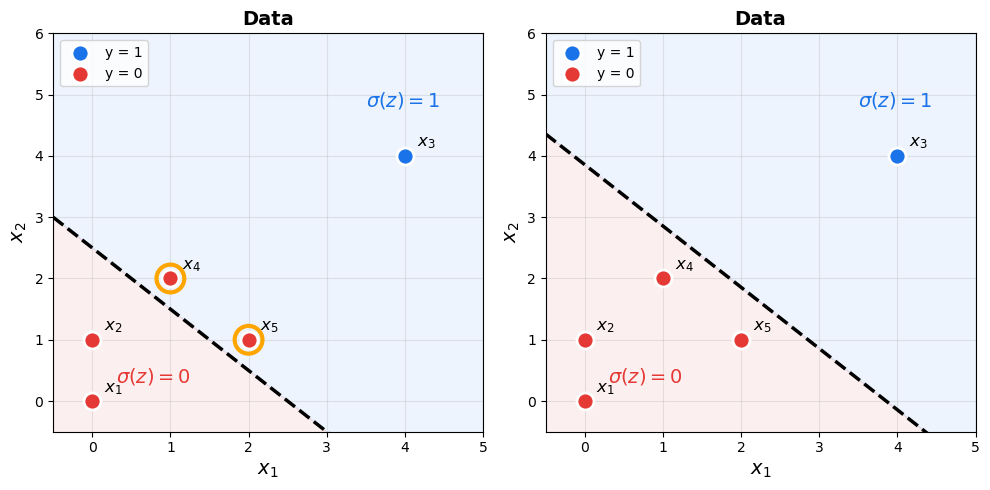

In [11]:
def decision_boundary(w, x1_range):
    """결정경계 x2 계산"""
    return -(w[0] + w[1] * x1_range) / w[2]

def plot_perceptron(ax, w, X, y, title, show_misclassified=False):
    """퍼셉트론 시각화"""
    
    ax = plot_data(ax, X, y, 'Data')
    
    x1_range = np.linspace(-0.5, 5, 100)

    # 결정경계
    x2_boundary = decision_boundary(w, x1_range)
    ax.plot(x1_range, x2_boundary, 'k--', linewidth=2.5, label='Decision Boundary')
    
    # 영역 색칠
    ax.fill_between(x1_range, x2_boundary, 6, alpha=0.08, color='#1a73e8')
    ax.fill_between(x1_range, -1, x2_boundary, alpha=0.08, color='#e53935')
    
    # 영역 라벨
    ax.text(3.5, 4.8, r'$\sigma(z) = 1$', fontsize=14, color='#1a73e8', fontweight='bold')
    ax.text(0.3, 0.3, r'$\sigma(z) = 0$', fontsize=14, color='#e53935', fontweight='bold')
    
    # 오분류 표시
    if show_misclassified:
        ax.scatter([1, 2], [2, 1], s=400, facecolors='none', 
                   edgecolors='orange', linewidths=3, zorder=4, label='Misclassified')

# 비교 그래프
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

plot_perceptron(axes[0], w, X, y, 'Before Update', show_misclassified=True)
plot_perceptron(axes[1], w_new, X, y, 'After Update', show_misclassified=False)

plt.tight_layout()
plt.show()

---
## 전체 과정 요약

| 단계 | 수식 | 결과 |
|:---|:---|:---|
| 초기 가중치 | $\mathbf{w} = (-25, 10, 10)$ | |
| z 계산 | $\mathbf{z} = \mathbf{X}\mathbf{w}$ | $(-25, -15, +55, +5, +5)$ |
| 예측 | $\hat{\mathbf{y}} = \sigma(\mathbf{z})$ | $(0, 0, 1, 1, 1)$ |
| 오차 | $\mathbf{e} = \mathbf{y} - \hat{\mathbf{y}}$ | $(0, 0, 0, -1, -1)$ |
| 그래디언트 | $\nabla J = -\mathbf{X}^T \mathbf{e}$ | $(+2, +3, +3)$ |
| 갱신 | $\mathbf{w}' = \mathbf{w} - \rho \nabla J$ | $(-27, 7, 7)$ |
| 결과 | 오분류 수 | $2 \rightarrow 0$ ✓ |

---
## 연습 문제

아래 셀에서 초기 가중치나 데이터를 변경해보고, 학습 과정이 어떻게 달라지는지 확인해보세요.

In [12]:
# 여기에 코드를 작성하세요
# 예: w_test = np.array([-30, 5, 5])
